In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    roc_curve,
    auc,
    classification_report,
    confusion_matrix,
)

In [8]:
# Load Dataset
df = pd.read_csv(r'/Users/sachintony/Desktop/BCA/6BCA/ML/USRECD.csv')
print("Dataset Loaded:\n", df.head())
print("\nDataset Info:")
print(df.info())

Dataset Loaded:
    Year     Month     Region Home Size Purchase Completion  \
0  2022  December    Midwest    Double                  No   
1  2022  December    Midwest   Single                   No   
2  2022  December    Midwest    Total1                  No   
3  2022  December  Northeast    Double                  No   
4  2022  December  Northeast   Single                   No   

   Average Sales Price  Number of Households (Thousands)  \
0               144300                             28280   
1                82300                             28280   
2               104700                             28280   
3               158300                             22630   
4                75300                             22630   

   Median Income - Current Dollars  Median Income - 2022 Dollars  \
0                            73070                         73070   
1                            73070                         73070   
2                            73070           


Missing Values:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64

After Handling Missing Values:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64

Descriptive Statistics:
              Year  Average Sales Price  Number of Households 

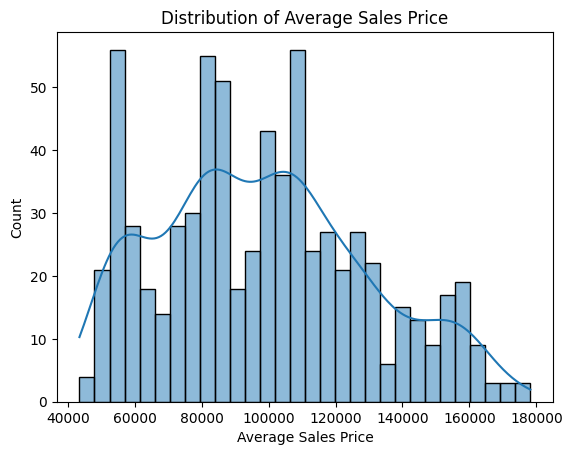

/var/folders/46/tr7jpvg55437fx19_y030wb40000gn/T/ipykernel_2289/691480547.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df, palette='pastel')


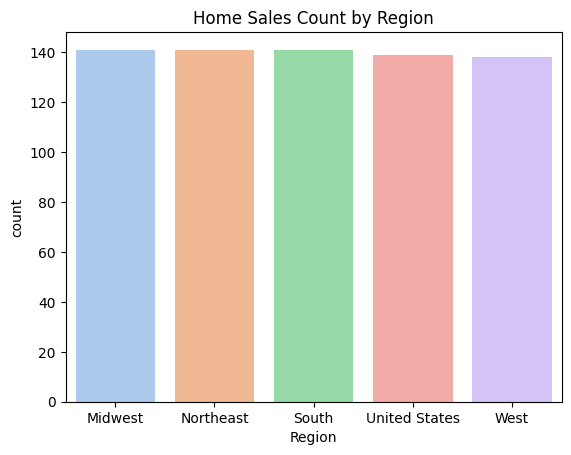

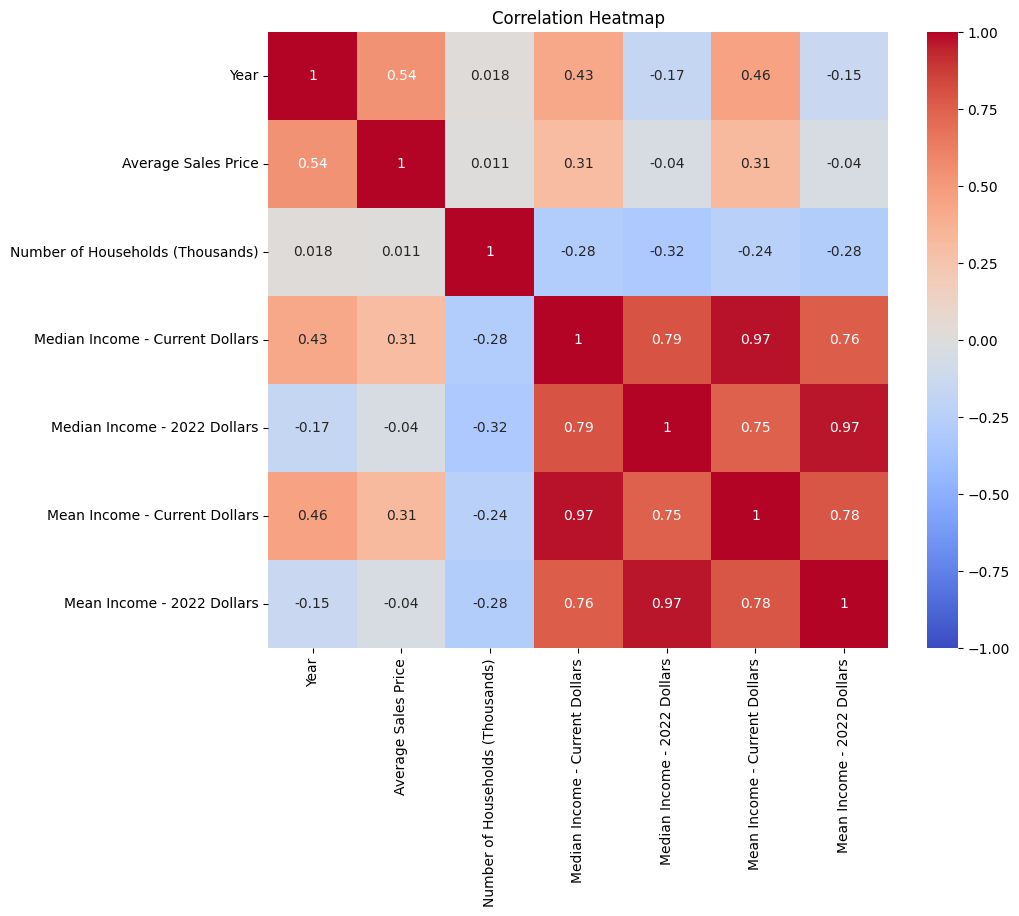

In [9]:
# Detailed EDA
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("\nAfter Handling Missing Values:\n", df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Visualization
# Distribution of Average Sales Price
sns.histplot(df['Average Sales Price'], bins=30, kde=True)
plt.title('Distribution of Average Sales Price')
plt.show()

# Count plot of Regions
sns.countplot(x='Region', data=df, palette='pastel')
plt.title('Home Sales Count by Region')
plt.show()

# Correlation Heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering
# Encode categorical features
categorical_cols = ['Region', 'Home Size']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Create a new feature: Income Ratio
df['Income_Ratio'] = df['Median Income - Current Dollars'] / df['Mean Income - Current Dollars']

# Drop unnecessary columns
df_reduced = df[['Region', 'Home Size', 'Average Sales Price', 'Income_Ratio', 'Purchase Completion']]

In [4]:
# --- Train-Test Split ---
X = df_reduced.drop(columns=['Purchase Completion'])  # Features
y = df_reduced['Purchase Completion']  # Target

# Encode target variable if necessary
y = LabelEncoder().fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [5]:
# Decision Tree Classifiers
# Gini Index
gini_tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
gini_tree.fit(X_train, y_train)
y_pred_gini = gini_tree.predict(X_test)

# Entropy
entropy_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
entropy_tree.fit(X_train, y_train)
y_pred_entropy = entropy_tree.predict(X_test)

In [6]:
# Accuracy 
print("\nAccuracy (Gini):", accuracy_score(y_test, y_pred_gini))
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))

# Precision, Recall, and F-Score
precision_gini, recall_gini, fscore_gini, _ = precision_recall_fscore_support(y_test, y_pred_gini, average='weighted')
precision_entropy, recall_entropy, fscore_entropy, _ = precision_recall_fscore_support(y_test, y_pred_entropy, average='weighted')

print("\nPrecision (Gini):", precision_gini)
print("Recall (Gini):", recall_gini)
print("F-Score (Gini):", fscore_gini)

print("\nPrecision (Entropy):", precision_entropy)
print("Recall (Entropy):", recall_entropy)
print("F-Score (Entropy):", fscore_entropy)


Accuracy (Gini): 0.5333333333333333
Accuracy (Entropy): 0.5333333333333333

Precision (Gini): 0.3869918699186992
Recall (Gini): 0.5333333333333333
F-Score (Gini): 0.38895833333333335

Precision (Entropy): 0.2962962962962963
Recall (Entropy): 0.5333333333333333
F-Score (Entropy): 0.38095238095238093


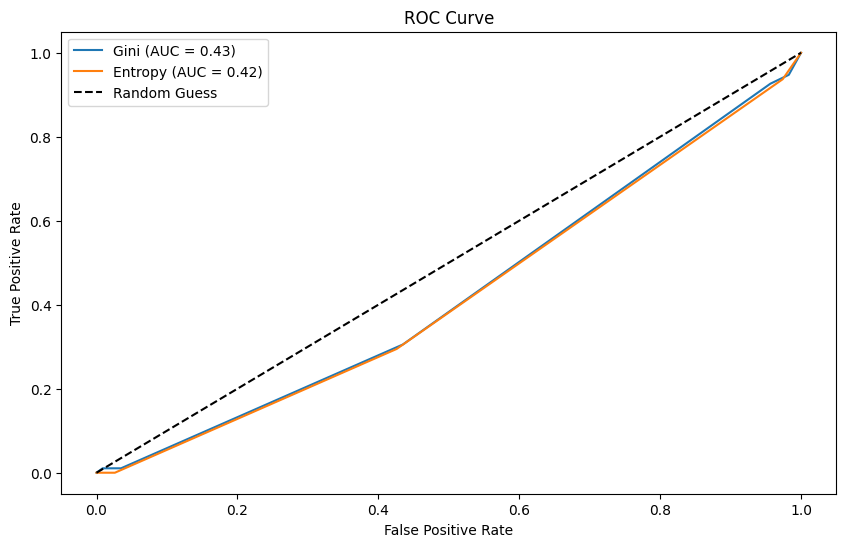


Comparative Analysis:
Accuracy (Gini): 0.5333333333333333
Accuracy (Entropy): 0.5333333333333333
F-Score (Gini): 0.38895833333333335
F-Score (Entropy): 0.38095238095238093


In [7]:
# ROC Curve
fpr_gini, tpr_gini, _ = roc_curve(y_test, gini_tree.predict_proba(X_test)[:, 1])
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, entropy_tree.predict_proba(X_test)[:, 1])

roc_auc_gini = auc(fpr_gini, tpr_gini)
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label=f"Gini (AUC = {roc_auc_gini:.2f})")
plt.plot(fpr_entropy, tpr_entropy, label=f"Entropy (AUC = {roc_auc_entropy:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# --- Comparative Analysis ---
print("\nComparative Analysis:")
print("Accuracy (Gini):", accuracy_score(y_test, y_pred_gini))
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))
print("F-Score (Gini):", fscore_gini)
print("F-Score (Entropy):", fscore_entropy)

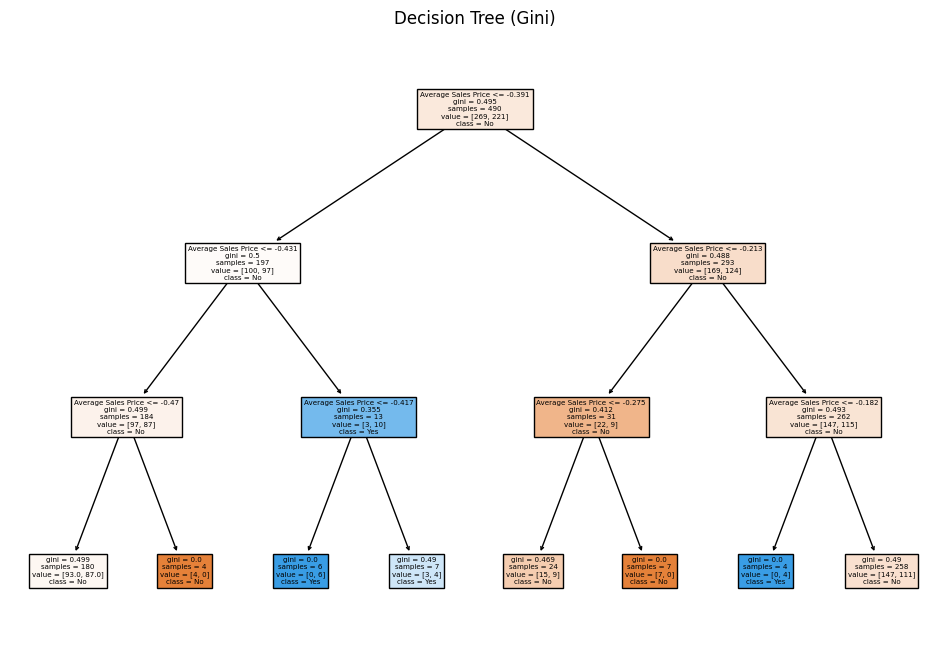

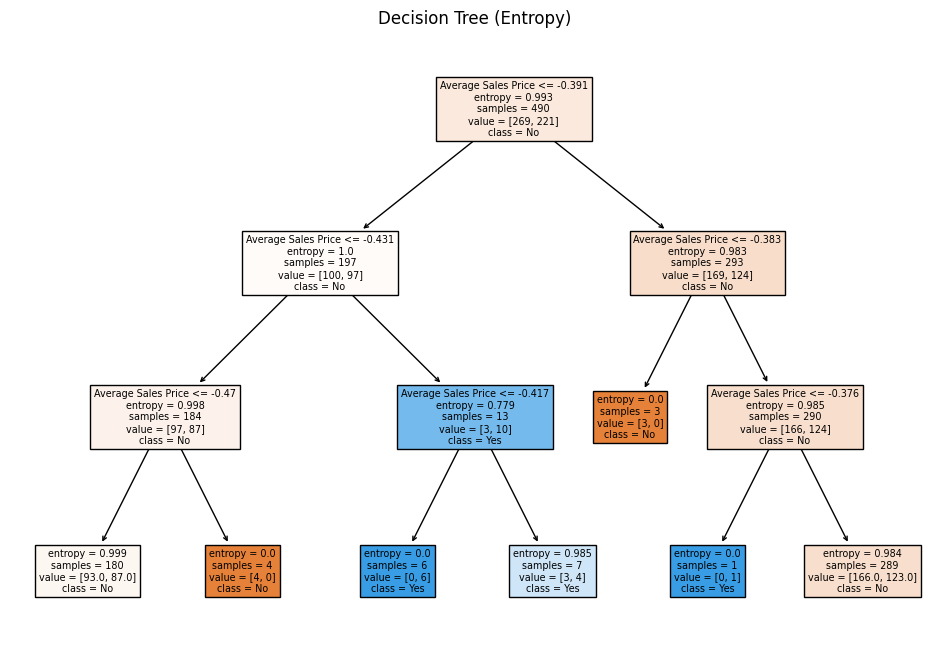

In [8]:
# Visualization of Trees
# Gini Tree
plt.figure(figsize=(12, 8))
plot_tree(gini_tree, filled=True, feature_names=['Region', 'Home Size', 'Average Sales Price', 'Income_Ratio'], 
          class_names=["No", "Yes"])
plt.title("Decision Tree (Gini)")
plt.show()

# Entropy Tree
plt.figure(figsize=(12, 8))
plot_tree(entropy_tree, filled=True, feature_names=['Region', 'Home Size', 'Average Sales Price', 'Income_Ratio'], 
          class_names=["No", "Yes"])
plt.title("Decision Tree (Entropy)")
plt.show()

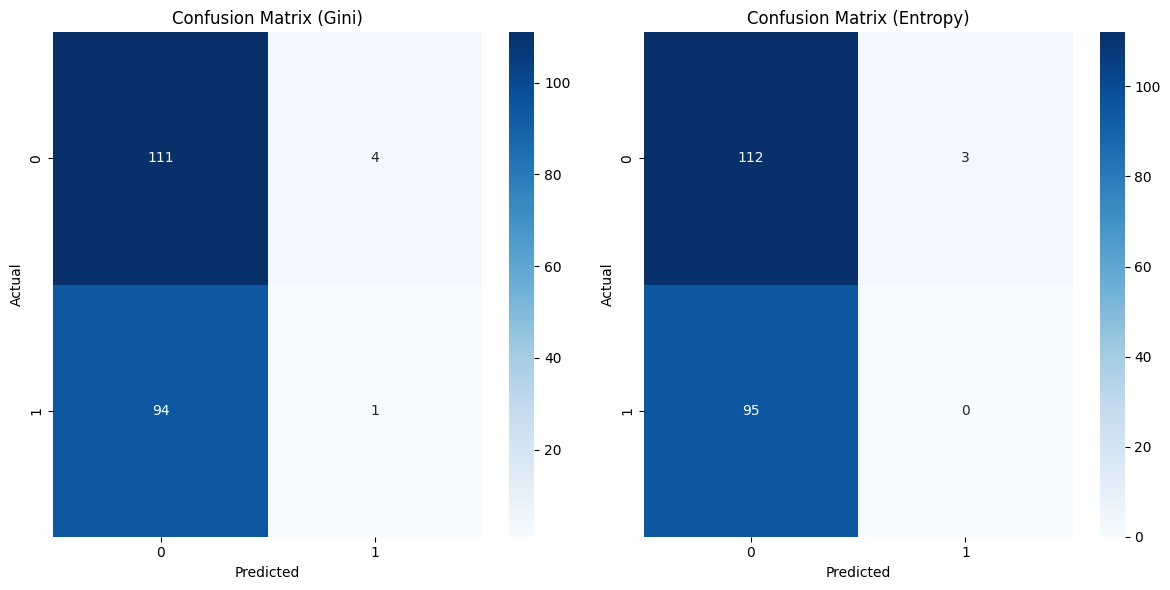

In [9]:
# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_gini), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix (Gini)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_entropy), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix (Entropy)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()